<a href="https://colab.research.google.com/github/bramha574/SDP/blob/main/softwaredefectprediction_code_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn
!pip install matplotlib
!pip install sklearn

In [3]:
import pandas as pd
import numpy as np

#Reading the dataset
codemetrics = pd.read_csv("/content/READYTOMLCODEMETRICS.csv")

In [4]:
codemetrics

,Unnamed: 0,entity,Parent,McCC,CLOC,LLOC,LOC,BUG_STATUS
0,0,test/__init__.py,L114,1,0,0,1,0.0
1,1,test/helper.py,L114,55,12,233,282,0.0
2,2,test/test_InfoExtractor.py,L114,7,50,1045,1132,1.0
3,3,test/test_YoutubeDL.py,L114,14,39,792,994,1.0
4,4,test/test_YoutubeDLCookieJar.py,L114,1,4,36,51,0.0
...,...,...,...,...,...,...,...,...
37209,37209,pipenv/vendor/urllib3/packages/ssl_match_hostn...,L70825,1,7,14,22,1.0
37210,37210,pipenv/vendor/urllib3/packages/ssl_match_hostn...,L70825,29,53,103,160,1.0
37211,37211,pipenv/vendor/importlib_resources/tests/data01...,L49302,1,0,0,1,1.0
37212,37212,pipenv/vendor/importlib_resources/tests/data02...,L49312,1,0,0,1,1.0


In [ ]:
codemetrics.isnull().sum()

Unnamed: 0    0
entity        0
Parent        0
McCC          0
CLOC          0
LLOC          0
LOC           0
BUG_STATUS    0
dtype: int64

In [ ]:
#Quick description of data
codemetrics.info()
codemetrics.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37214 entries, 0 to 37213
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37214 non-null  int64  
 1   entity      37214 non-null  object 
 2   Parent      37214 non-null  object 
 3   McCC        37214 non-null  int64  
 4   CLOC        37214 non-null  int64  
 5   LLOC        37214 non-null  int64  
 6   LOC         37214 non-null  int64  
 7   BUG_STATUS  37214 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.3+ MB


,Unnamed: 0,McCC,CLOC,LLOC,LOC,BUG_STATUS
count,37214.000000,37214.000000,37214.000000,37214.000000,37214.000000,37214.000000
mean,18606.500000,8.323507,4.928522,106.671441,171.009674,0.420594
std,10742.900795,24.978090,49.210669,229.113235,350.575902,0.493661
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9303.250000,1.000000,0.000000,20.000000,51.000000,0.000000
50%,18606.500000,2.000000,0.000000,48.000000,90.000000,0.000000
75%,27909.750000,7.000000,0.000000,108.000000,175.000000,1.000000
max,37213.000000,866.000000,3195.000000,11089.000000,26422.000000,1.000000


In [ ]:
#Removing the un necessary columns
codemetrics.drop(['Unnamed: 0', 'entity', 'Parent'], inplace=True, axis=1)

<AxesSubplot:xlabel='BUG_STATUS', ylabel='count'>

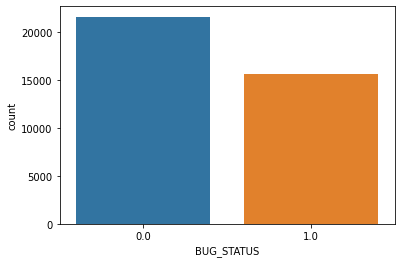

In [ ]:

import seaborn as sns
sns.countplot(x='BUG_STATUS', data=codemetrics)

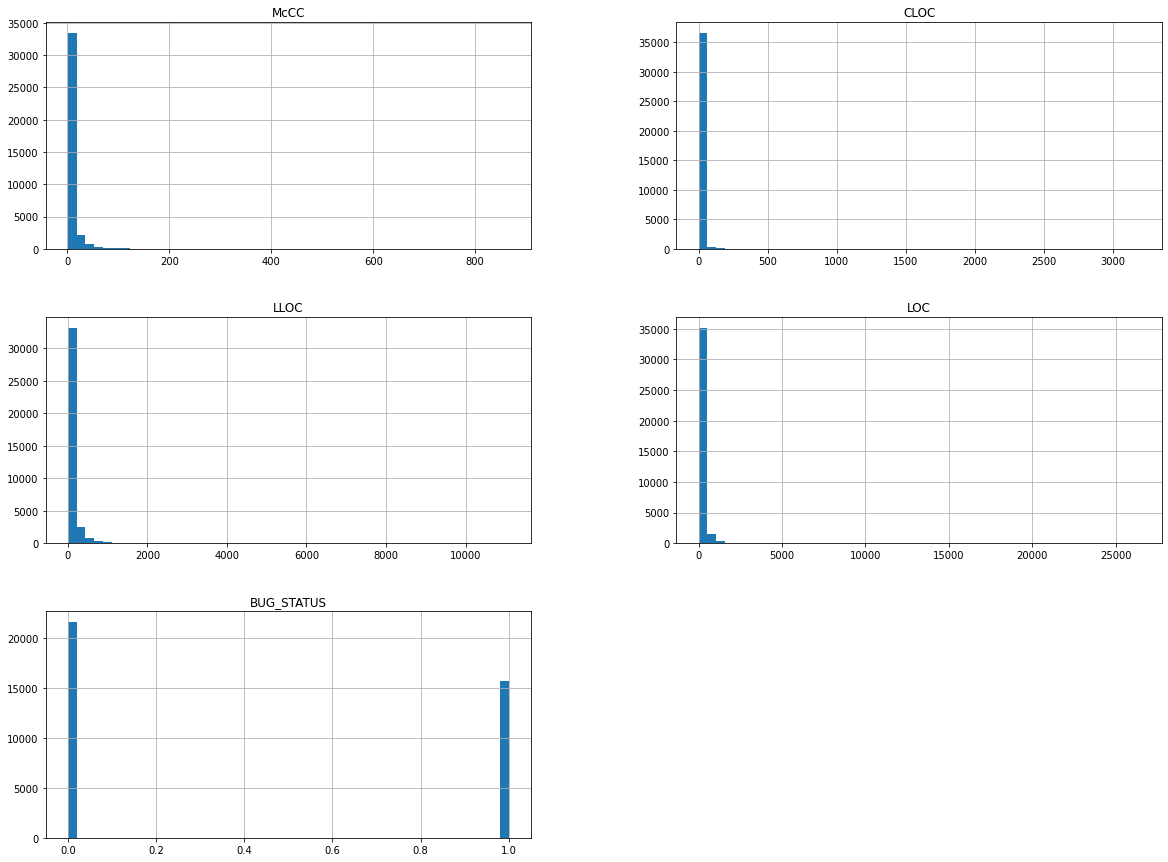

In [ ]:
import matplotlib.pyplot as plt
codemetrics.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
# #train and test set splitting
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(codemetrics,test_size=0.2,random_state=42)

In [ ]:
x = len(train_set)
y = len(test_set)
print(train_set.shape)
print(test_set.shape)

(29771, 5)
(7443, 5)


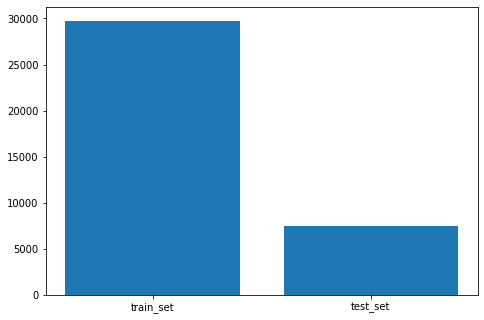

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
set_ = ['train_set','test_set']
length =  [x,y]
ax.bar(set_,length)
plt.show()

In [ ]:
codemetrics = train_set.copy()

In [ ]:
#checking correlation
corr_matrix = codemetrics.corr()
corr_matrix["BUG_STATUS"].sort_values(ascending=False)

BUG_STATUS    1.000000
LLOC          0.182434
LOC           0.156906
McCC          0.115525
CLOC          0.091014
Name: BUG_STATUS, dtype: float64

array([[<AxesSubplot:xlabel='BUG_STATUS', ylabel='BUG_STATUS'>,
        <AxesSubplot:xlabel='McCC', ylabel='BUG_STATUS'>,
        <AxesSubplot:xlabel='CLOC', ylabel='BUG_STATUS'>,
        <AxesSubplot:xlabel='LLOC', ylabel='BUG_STATUS'>,
        <AxesSubplot:xlabel='LOC', ylabel='BUG_STATUS'>],
       [<AxesSubplot:xlabel='BUG_STATUS', ylabel='McCC'>,
        <AxesSubplot:xlabel='McCC', ylabel='McCC'>,
        <AxesSubplot:xlabel='CLOC', ylabel='McCC'>,
        <AxesSubplot:xlabel='LLOC', ylabel='McCC'>,
        <AxesSubplot:xlabel='LOC', ylabel='McCC'>],
       [<AxesSubplot:xlabel='BUG_STATUS', ylabel='CLOC'>,
        <AxesSubplot:xlabel='McCC', ylabel='CLOC'>,
        <AxesSubplot:xlabel='CLOC', ylabel='CLOC'>,
        <AxesSubplot:xlabel='LLOC', ylabel='CLOC'>,
        <AxesSubplot:xlabel='LOC', ylabel='CLOC'>],
       [<AxesSubplot:xlabel='BUG_STATUS', ylabel='LLOC'>,
        <AxesSubplot:xlabel='McCC', ylabel='LLOC'>,
        <AxesSubplot:xlabel='CLOC', ylabel='LLOC'>,
        <A

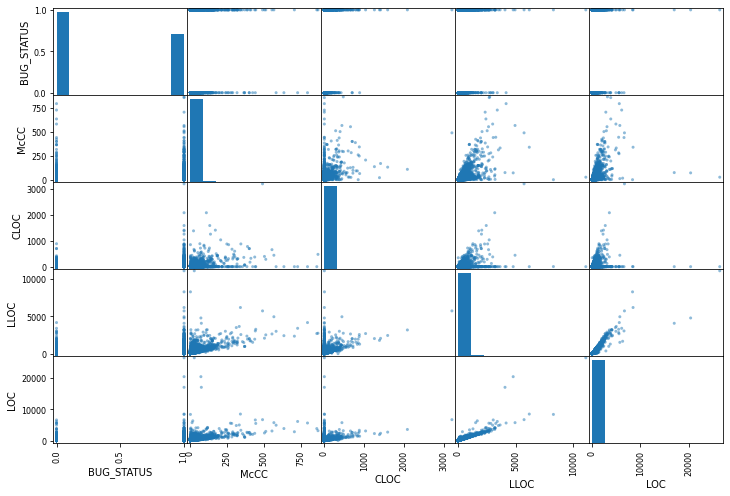

In [ ]:
#checking correlation with scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["BUG_STATUS","McCC","CLOC","LLOC", "LOC"]
scatter_matrix(codemetrics[attributes],figsize=(12,8))

In [ ]:
X_train = train_set.drop("BUG_STATUS",axis=1)
y_train = train_set['BUG_STATUS'].copy()

X_test = test_set.drop("BUG_STATUS",axis=1)
y_test = test_set['BUG_STATUS'].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.29447239, -0.10838967, -0.37603494, -0.33705662],
       [-0.29447239, -0.10838967, -0.43390655, -0.37041937],
       [-0.01267304, -0.10838967, -0.32706667, -0.30647411],
       ...,
       [-0.29447239, -0.10838967, -0.44280987, -0.36485891],
       [-0.25421534, -0.10838967, -0.32706667, -0.23974862],
       [ 0.26912631, -0.10838967,  0.02016294,  0.05495563]])

In [ ]:
y_train

3923     0.0
24375    0.0
21840    0.0
686      0.0
30332    0.0
        ... 
16850    1.0
6265     1.0
11284    0.0
860      1.0
15795    1.0
Name: BUG_STATUS, Length: 29771, dtype: float64

In [ ]:
X_test

array([[-0.29447239, -0.10838967, -0.45171319, -0.39822165],
       [-0.29447239, -0.10838967,  0.79030041,  0.54427588],
       [-0.29447239, -0.10838967, -0.42500322, -0.37876005],
       ...,
       [-0.29447239, -0.10838967, -0.44280987, -0.38710074],
       [-0.29447239, -0.10838967, -0.34042165, -0.28979273],
       [-0.25421534,  1.45207066,  0.32287594,  0.39414353]])

In [ ]:
y_test

12778    0.0
27239    1.0
5553     0.0
6394     0.0
7718     1.0
        ... 
24410    0.0
12890    0.0
20986    0.0
996      1.0
36655    1.0
Name: BUG_STATUS, Length: 7443, dtype: float64

In [ ]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [ ]:
# Classifiers:
# Logistic Regression
# Decision Tree
# Support Vector Machine

# Linear Discriminant Analysis
# Quadratic Discriminant Analysis
# Random Forest
# K-Nearest Neighbors
# Naive Bayes

# Scoring:
# precision score
# recall score
# F1 score
# support score
# accuracy score
# AUC/ROC

Cross validation Accuracy:
Accuracy: 0.634 (0.010)
GRID SEARCH FOR DECISION TREE CLASSIFIER
Best Parameters
{'random_state': 36}
Best estimaters
DecisionTreeClassifier(random_state=36)
CONFUSION MATRIX
[[3232 1123]
 [1578 1510]]
              precision    recall  f1-score   support

         0.0       0.67      0.74      0.71      4355
         1.0       0.57      0.49      0.53      3088

    accuracy                           0.64      7443
   macro avg       0.62      0.62      0.62      7443
weighted avg       0.63      0.64      0.63      7443

Accuracy: 0.6371086927314255
Precision: 0.5734903152297759
Recall: 0.4889896373056995
F1 Score: 0.5278797413039679
Mean Absolute Error: 0.3628913072685745
Cohens kappa: 0.23618743088667005
ROC AUC: 0.615562556884767


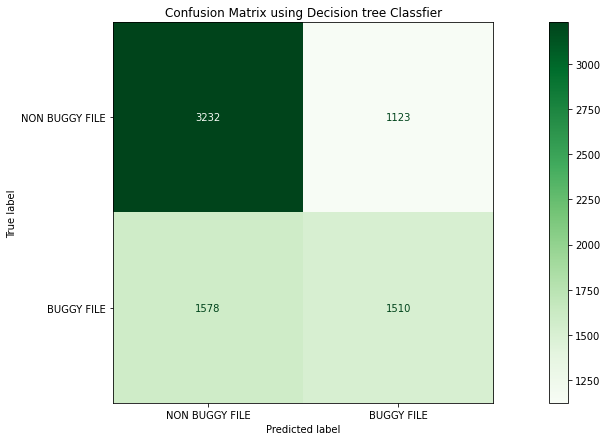

In [ ]:
# Decision Tree
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# create model
model = DecisionTreeClassifier()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR DECISION TREE CLASSIFIER")

params = { 
    "random_state":range(30,40)} 
gs_Deci = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_Deci.fit(X_train, y_train)

print("Best Parameters")
print(gs_Deci.best_params_)

print("Best estimaters")
print(gs_Deci.best_estimator_)

#Predicting Bugs
y_pred = gs_Deci.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

RF_confusion = plot_confusion_matrix(gs_Deci.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


RF_confusion.ax_.set_title("Confusion Matrix using Decision tree Classfier")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

Cross validation Accuracy:
Accuracy: 0.630 (0.004)
GRID SEARCH FOR Logistic Regression
Best Parameters
{'random_state': 30}
Best estimaters
LogisticRegression(random_state=30)
CONFUSION MATRIX
[[4070  285]
 [2419  669]]
              precision    recall  f1-score   support

         0.0       0.63      0.93      0.75      4355
         1.0       0.70      0.22      0.33      3088

    accuracy                           0.64      7443
   macro avg       0.66      0.58      0.54      7443
weighted avg       0.66      0.64      0.58      7443

Accuracy: 0.6367056294504904
Precision: 0.7012578616352201
Recall: 0.21664507772020725
F1 Score: 0.3310242454230579
Mean Absolute Error: 0.3632943705495096
Cohens kappa: 0.16810152086360597
ROC AUC: 0.5756015285271531


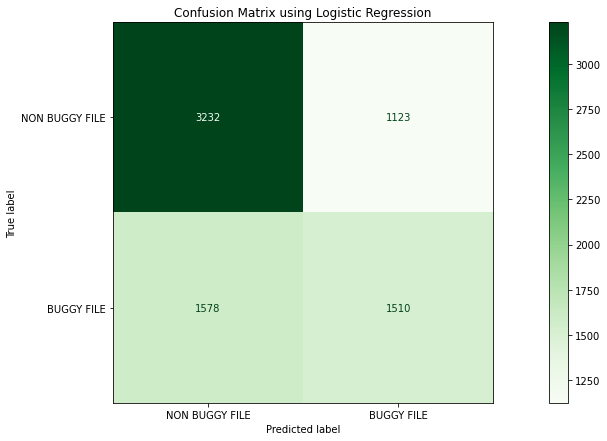

In [ ]:
# Logistic regression
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = LogisticRegression()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR Logistic Regression")

params = { 
    "random_state":range(30,40)} 
gs_logi = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_logi.fit(X_train, y_train)

print("Best Parameters")
print(gs_logi.best_params_)

print("Best estimaters")
print(gs_logi.best_estimator_)

#Predicting Bugs
y_pred = gs_logi.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_Deci.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Logistic Regression")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

In [ ]:
# Support Vector Machine
from numpy import mean
from numpy import std
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = SVC(gamma='auto')

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR SVM")

params = { 
    "random_state":range(30,40)} 

#Predicting Bugs
y_pred = gs_svm.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_svm.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Support Vector Machine")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

In [ ]:
#Random Forest
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = RandomForestRegressor()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR Random Forest")


#Predicting Bugs
y_pred = gs_rd.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_rd.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Random Forest")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

In [ ]:
#Naive Bayes
from numpy import mean
from numpy import std
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = GaussianNB()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR Random Forest")

params = { 
    "random_state":range(30,40)} 
gs_nb = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_nb.fit(X_train, y_train)

print("Best Parameters")
print(gs_nb.best_params_)

print("Best estimaters")
print(gs_nb.best_estimator_)

#Predicting Bugs
y_pred = gs_nb.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_nb.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Naive Bayes")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

In [ ]:
# Multilayer perceptron
from numpy import mean
from numpy import std
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = MLPClassifier()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR Multilayer perceptron")

params = { 
    "random_state":range(30,40)} 
gs_mlp = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_mlp.fit(X_train, y_train)

print("Best Parameters")
print(gs_mlp.best_params_)

print("Best estimaters")
print(gs_mlp.best_estimator_)

#Predicting Bugs
y_pred = gs_mlp.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_mlp.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using Multilayer perceptron")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")

In [ ]:
#AdaBoost
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create model
model = AdaBoostClassifier()

#===================================================================================================
#cross validation 

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
# report performance
print(50*"=")
print("Cross validation Accuracy:")
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
print(50*"=")

#====================================================================================================
print(50*"=")
print("GRID SEARCH FOR AdaBoost")

params = { 
    "random_state":range(30,40)} 
gs_ada = GridSearchCV(model,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
gs_ada.fit(X_train, y_train)

print("Best Parameters")
print(gs_ada.best_params_)

print("Best estimaters")
print(gs_ada.best_estimator_)

#Predicting Bugs
y_pred = gs_ada.best_estimator_.predict(X_test)

#CONFUSION MATRIX
print(50*"=")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

class_names=['NON BUGGY FILE','BUGGY FILE']

confusion = plot_confusion_matrix(gs_ada.best_estimator_,X_test,y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None, values_format = '.0f')


confusion.ax_.set_title("Confusion Matrix using AdaBoost")

print(50*"=")
print(classification_report(y_test,y_pred))
print(50*"=")
#====================================================================================================

# Model Accuracy: how often is the classifier correct?
RF_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RF_Accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))
print(50*"=")